In [1]:
from pathlib import Path
from pandas import Timestamp
from typing import Tuple, List

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from cycler import cycler
from IPython.display import Image

# Import seaborn
#import seaborn as sns

import hillmaker as hm
from hillmaker.hmlib import pctile_field_name

In [2]:
ssu_stopdata = '../data/ShortStay.csv'
ssu_stops_df = pd.read_csv(ssu_stopdata, parse_dates=['InRoomTS','OutRoomTS'])
ssu_stops_df.info() # Check out the structure of the resulting DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59877 entries, 0 to 59876
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PatID      59877 non-null  int64         
 1   InRoomTS   59877 non-null  datetime64[ns]
 2   OutRoomTS  59877 non-null  datetime64[ns]
 3   PatType    59877 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.8+ MB


In [3]:
# Required inputs
scenario_name = 'ssu_1'
stops_df = ssu_stops_df
in_field_name = 'InRoomTS'
out_field_name = 'OutRoomTS'
start_date = '1996-01-01'
end_date = '1996-09-30'

# Optional inputs

cat_field_name = 'PatType'
verbosity = 1 # INFO level logging
output_path = './output'
bin_size_minutes = 60

s1 = hm.Scenario(scenario_name=scenario_name, 
                         stops_df=stops_df,
                         in_field=in_field_name,
                         out_field=out_field_name,
                         start_analysis_dt=start_date,
                         end_analysis_dt=end_date,
                         cat_field=cat_field_name,
                         output_path=Path('./output'),
                         verbosity=verbosity)

In [4]:
s1.make_hills()

2023-08-29 15:17:43,865 - hillmaker.bydatetime - INFO - min of intime: 1996-01-01 07:44:00
2023-08-29 15:17:43,866 - hillmaker.bydatetime - INFO - max of intime: 1996-09-29 19:51:00
2023-08-29 15:17:43,867 - hillmaker.bydatetime - INFO - min of outtime: 1996-01-01 08:50:00
2023-08-29 15:17:43,868 - hillmaker.bydatetime - INFO - max of outtime: 1996-09-29 20:15:00
2023-08-29 15:17:43,868 - hillmaker.bydatetime - INFO - start analysis: 1996-01-01, end analysis: 1996-09-30
2023-08-29 15:17:43,886 - hillmaker.bydatetime - INFO - min of entry time_bin = 7
2023-08-29 15:17:43,888 - hillmaker.bydatetime - INFO - max of exit time_bin = 6546 and num_bins=6553
2023-08-29 15:17:44,528 - hillmaker.bydatetime - INFO - cat IVT {'inner': 33019}
2023-08-29 15:17:44,634 - hillmaker.bydatetime - INFO - cat IVT num_arrivals_hm 33019 num_arrivals_stops 33019
2023-08-29 15:17:44,635 - hillmaker.bydatetime - INFO - cat IVT num_departures_hm 33019 num_departures_stops 33019
2023-08-29 15:17:44,638 - hillmake

In [5]:
occ_summary_cat_df = s1.get_summary_df()
occ_summary_cat_df

count  mean  min  max  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                          
ART     0           Mon      0          00:00            40.0   0.0  0.0  0.0   
                             1          01:00            39.0   0.0  0.0  0.0   
                             2          02:00            39.0   0.0  0.0  0.0   
                             3          03:00            39.0   0.0  0.0  0.0   
                             4          04:00            39.0   0.0  0.0  0.0   
...                                                       ...   ...  ...  ...   
OTH     6           Sun      19         19:00            39.0   0.0  0.0  0.0   
                             20         20:00            39.0   0.0  0.0  0.0   
                             21         21:00            39.0   0.0  0.0  0.0   
                             22         22:00            39.0   0.0  0.0  0.0   
                             23         23:00            39.0   0.0  0.0  0.0   

                                                        stdev  sem  var   cv  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                         
ART     0           Mon      0          00:00             0.0  0.0  0.0  0.0   
                             1          01:00             0.0  0.0  0.0  0.0   
                             2          02:00             0.0  0.0  0.0  0.0   
                             3          03:00             0.0  0.0  0.0  0.0   
                             4          04:00             0.0  0.0  0.0  0.0   
...                                                       ...  ...  ...  ...   
OTH     6           Sun      19         19:00             0.0  0.0  0.0  0.0   
                             20         20:00             0.0  0.0  0.0  0.0   
                             21         21:00             0.0  0.0  0.0  0.0   
                             22         22:00             0.0  0.0  0.0  0.0   
                             23         23:00             0.0  0.0  0.0  0.0   

                                                        skew  kurt  p25  p50  \
PatType day_of_week dow_name bin_of_day bin_of_day_str                         
ART     0           Mon      0          00:00            0.0   0.0  0.0  0.0   
                             1          01:00            0.0   0.0  0.0  0.0   
                             2          02:00            0.0   0.0  0.0  0.0   
                             3          03:00            0.0   0.0  0.0  0.0   
                             4          04:00            0.0   0.0  0.0  0.0   
...                                                      ...   ...  ...  ...   
OTH     6           Sun      19         19:00            0.0   0.0  0.0  0.0   
                             20         20:00            0.0   0.0  0.0  0.0   
                             21         21:00            0.0   0.0  0.0  0.0   
                             22         22:00            0.0   0.0  0.0  0.0   
                             23         23:00            0.0   0.0  0.0  0.0   

                                                        p75  p95  p99  
PatType day_of_week dow_name bin_of_day bin_of_day_str                 
ART     0           Mon      0          00:00           0.0  0.0  0.0  
                             1          01:00           0.0  0.0  0.0  
                             2          02:00           0.0  0.0  0.0  
                             3          03:00           0.0  0.0  0.0  
                             4          04:00           0.0  0.0  0.0  
...                                                     ...  ...  ...  
OTH     6           Sun      19         19:00           0.0  0.0  0.0  
                             20         20:00           0.0  0.0  0.0  
                             21         21:00           0.0  0.0  0.0  
                             22         22:00           0.0  0.0  0.0  
                             23         23:00           

In [6]:
occ_summary_df = s1.get_summary_df(by_category=False)
occ_summary_df[25:40]

count       mean        min  \
day_of_week dow_name bin_of_day bin_of_day_str                                
1           Tue      1          01:00            39.0   0.202991   0.000000   
                     2          02:00            39.0   0.146581   0.000000   
                     3          03:00            39.0   0.096581   0.000000   
                     4          04:00            39.0   0.092308   0.000000   
                     5          05:00            39.0   0.175641   0.000000   
                     6          06:00            39.0   2.454274   1.000000   
                     7          07:00            39.0  19.416239  12.666667   
                     8          08:00            39.0  27.877778  20.333333   
                     9          09:00            39.0  22.536325  10.816667   
                     10         10:00            39.0  32.497436  22.733333   
                     11         11:00            39.0  38.423077  27.350000   
                     12         12:00            39.0  39.510684  25.400000   
                     13         13:00            39.0  36.269231  25.350000   
                     14         14:00            39.0  31.405128  23.616667   
                     15         15:00            39.0  27.542308  19.583333   

                                                      max     stdev       sem  \
day_of_week dow_name bin_of_day bin_of_day_str                                  
1           Tue      1          01:00            1.333333  0.375022  0.060052   
                     2          02:00            1.466667  0.323703  0.051834   
                     3          03:00            0.750000  0.219755  0.035189   
                     4          04:00            1.000000  0.227491  0.036428   
                     5          05:00            1.300000  0.334992  0.053642   
                     6          06:00            5.000000  1.077486  0.172536   
                     7          07:00           24.083333  2.559290  0.409814   
                     8          08:00           33.283333  3.198180  0.512119   
                     9          09:00           30.116667  4.187706  0.670570   
                     10         10:00           39.150000  4.065801  0.651049   
                     11         11:00           49.066667  4.710699  0.754315   
                     12         12:00           49.666667  5.157644  0.825884   
                     13         13:00           42.983333  5.319737  0.851840   
                     14         14:00           38.450000  3.858078  0.617787   
                     15         15:00           38.216667  3.890403  0.622963   

                                                      var        cv      skew  \
day_of_week dow_name bin_of_day bin_of_day_str                                  
1           Tue      1          01:00            0.140641  1.847476  1.931038   
                     2          02:00            0.104783  2.208350  2.610424   
                     3          03:00            0.048292  2.275336  2.126966   
                     4          04:00            0.051752  2.464485  2.676122   
                     5          05:00            0.112220  1.907257  1.878066   
                     6          06:00            1.160975  0.439024  0.820301   
                     7          07:00            6.549963  0.131812 -0.426090   
                     8          08:00           10.228353  0.114721 -0.647689   
                     9          09:00           17.536884  0.185820 -0.672795   
                     10         10:00           16.530739  0.125111 -0.450546   
                     11         11:00           22.190682  0.122601 -0.535508   
                     12         12:00           26.601294  0.130538 -0.544897   
                     13         13:00           28.299599  0.146674 -0.631588   
                     14         14:00           14.884768  0.122849 -0.064790   
                     15       

In [7]:

def make_week_hill_plot(summary_df: pd.DataFrame, scenario_name: str, metric: str,
                        bin_size_minutes: int = 60,
                        cap: int = None,
                        plot_style: str = 'ggplot',
                        figsize: tuple = (15, 10),
                        bar_color_mean: str = 'steelblue',
                        percentiles: Tuple[float] | List[float] = (0.95, 0.75),
                        pctile_color: Tuple[str] | List[str] = ('black', 'grey'),
                        pctile_linestyle: Tuple[str] | List[str] = ('-', '-.'),
                        pctile_linewidth: Tuple[float] | List[float] = (0.75, 0.75),
                        xlabel: str = 'Hour',
                        ylabel: str = 'Patients',
                        export_path: Path | str | None = None,):
    """
    Makes and optionally exports week plot for occupancy, arrivals, or departures.

    Takes output DataFrames of `summarize.summarize` and plots mean and percentile
    values for occupancy, arrival, and departure categories.

    Parameters
    ----------
    summary_df : DataFrame
        Single summary df from the output of `summarize.summarize`
    scenario_name : str
        Used in output filenames
    metric : str
        One of 'occupancy', 'arrivals', 'departures'
    percentiles : list or tuple of floats (e.g. [0.75, 0.95]), optional
        Which percentiles to plot. Default is (0.95)
    pctile_colors : list of color codes (e.g. ['blue', 'green'] or list('gb')
        line color for each percentile series plotted
    pctile_linestyles : list of line styles (e.g. ['-', '--'])
        line style for each percentile series plotted
    bin_size_minutes : int, optional
        Number of minutes in each time bin of the day, default is 60. Use a value that
        divides into 1440 with no remainder
    cap : int, optional
        Capacity of area being analyzed, default is None
    week_range : str
        Week range of summary df. Default is 'week', can also take the form of
        the first three characters of a day of week name (ex: 'tue')
    xlabel : str
        x-axis label, default='Hour'
    ylabel : str
        y-axis label, default='Patients'
    export_path : str or None, default is None
        If not None, plot is exported to `export_path`
    """

    plt.style.use(plot_style)
    #with plt.style.context(plot_style):
        # Create empty sized figure
    fig1 = plt.figure(figsize=figsize)
    ax1 = fig1.add_subplot(1, 1, 1)

    # infer number of days being plotted
    num_days = len(summary_df) / (60 / bin_size_minutes * 24)

    # Create a list to use as the X-axis values
    num_bins = num_days * 1440 / bin_size_minutes
    base_dates = {'sun': '2015-01-04', 'mon': '2015-01-05', 'tue': '2015-01-06',
              'wed': '2015-01-07', 'thu': '2015-01-08', 'fri': '2015-01-09', 'sat': '2015-01-10'}
    first_dow = 'mon' # TODO - Need to resort series for plotting based on first_dow
    base_date_for_first_dow = base_dates[first_dow]
    timestamps = pd.date_range(base_date_for_first_dow, periods=num_bins, freq=f'{bin_size_minutes}Min').tolist()

    # Choose appropriate major and minor tick locations
    major_tick_locations = pd.date_range(f'{base_date_for_first_dow} 12:00:00', periods=7, freq='24H').tolist()
    minor_tick_locations = pd.date_range(f'{base_date_for_first_dow} 06:00:00', periods=42, freq='4H').tolist()

    # Set the tick locations for the axes object
    ax1.set_xticks(major_tick_locations)
    ax1.set_xticks(minor_tick_locations, minor=True)

    # Add data to the plot
    # Mean occupancy as bars - here's the GOTCHA involving the bar width
    bar_width = 1 / (1440 / bin_size_minutes)
    ax1.bar(timestamps, summary_df['mean'], label=f'Mean {metric}', width=bar_width, color=bar_color_mean)

    # Percentiles as lines
    # Style the line for the occupancy percentile
    cycler_pctiles = (cycler(color=pctile_color) + cycler(linestyle=pctile_linestyle) + cycler(linewidth=pctile_linewidth))
    ax1.set_prop_cycle(cycler_pctiles)
    #with plt.rc_context({'axes.prop_cycle': cycler_pctiles}):  
    for p in percentiles:
        pct_name = pctile_field_name(p)
        label = f'{pct_name[1:]}th %ile {metric}'
        ax1.plot(timestamps, summary_df[pct_name], label=label)

    # establish capacity horizontal line if supplied
    if cap is not None and metric == 'occupancy':
        plt.axhline(cap, color='r', linestyle='--', label='Capacity')

    # Create formatter variables
    day_fmt = '' if num_days == 1 else '%a'
    dayofweek_formatter = DateFormatter(day_fmt)
    qtrday_formatter = DateFormatter('%H')

    # Format the tick labels
    ax1.xaxis.set_major_formatter(dayofweek_formatter)
    ax1.xaxis.set_minor_formatter(qtrday_formatter)

    # Slide the major tick labels underneath the default location by 20 points
    ax1.tick_params(which='major', pad=20)

    # Add other chart elements

    # Set plot and axis titles
    week_range_str = 'week'
    sup_title = fig1.suptitle(f'{metric.title()} by Time of Day - {week_range_str.title()}\n{scenario_name.title()}',
                              x=0.125, y=0.95, horizontalalignment='left', verticalalignment='top', fontsize=16)

    ax1.set_title('All category types', loc='left', style='italic')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    # Legend
    ax1.legend(loc='best', frameon=True, facecolor='w')

    # save figure
    if export_path is not None:
        plot_png = f'{scenario_name}_{metric}_plot_{week_range_str}.png'
        png_wpath = Path(export_path, plot_png)
        plt.savefig(png_wpath, bbox_extra_artists=[sup_title], bbox_inches='tight')

    # Suppress plot output in notebook
    plt.close()

    return fig1

In [8]:
plot = make_week_hill_plot(summary_df=occ_summary_df, scenario_name='plot_test', metric='occupancy',
                        bin_size_minutes=60,
                        cap=52,
                        plot_style='ggplot',
                        figsize=(15, 10),
                        bar_color_mean='steelblue',
                        percentiles=(0.95, 0.75),
                        pctile_color=('black', 'grey'),
                        pctile_linestyle=('-', '-.'),
                        pctile_linewidth=(.75, .75),  
                        xlabel='Hour',
                        ylabel='Patients',
                        export_path='./output')

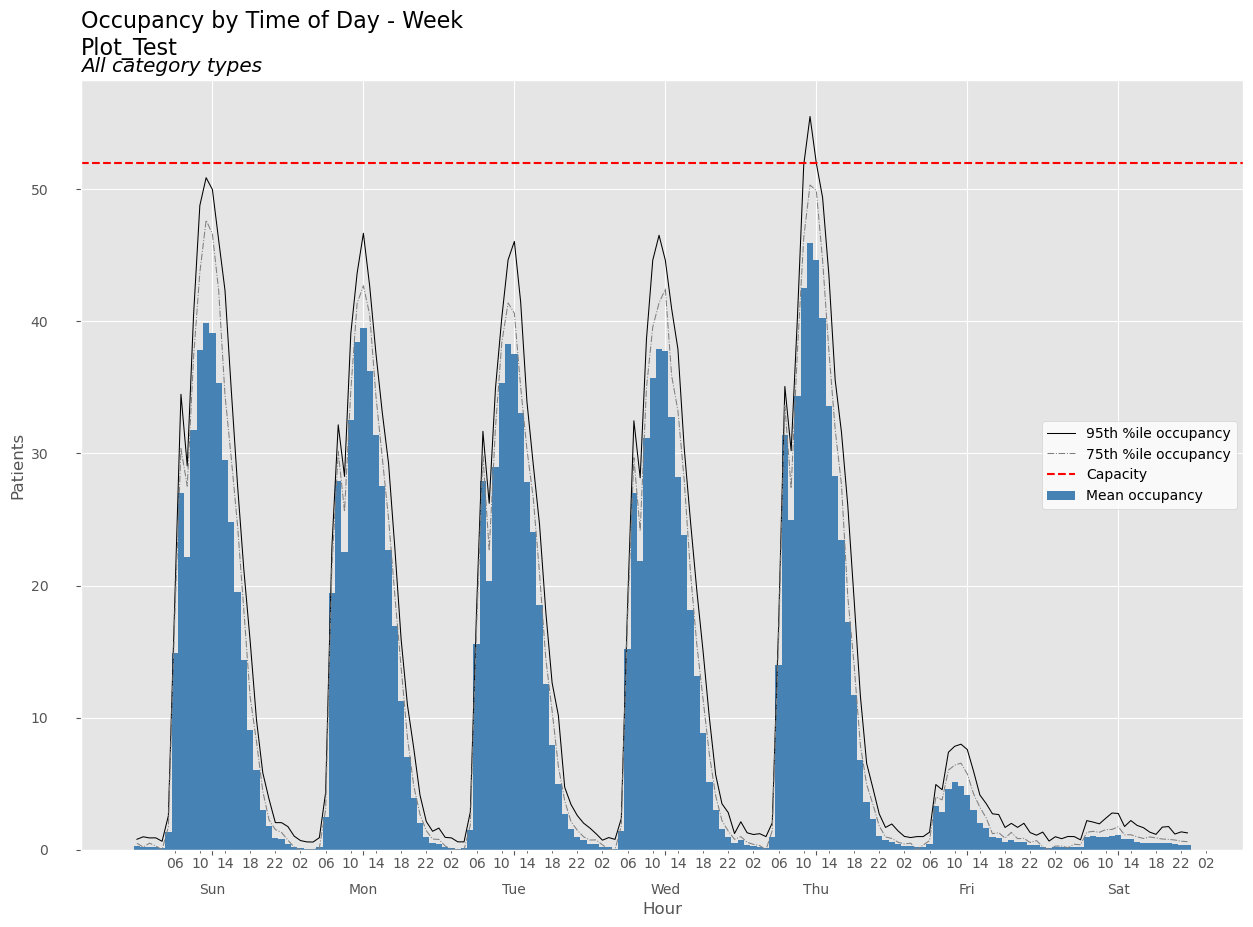

In [9]:
plot

## First dow - IGNORE

In [ ]:
def find_first_dow(year, month, dow):
    d = Timestamp(year, month, 1)
    offset = -d.weekday() #weekday = 0 means monday
    return d + timedelta(offset)

In [ ]:
year = 2015
month = 1
dow = 0

d = Timestamp(year, month, 1)
d

In [ ]:
dow_1 = d.weekday()
dow_1

In [ ]:
d + pd.Timedelta(7, unit="d") - pd.Timedelta(dow_1, unit="d")

In [ ]:
(d + pd.Timedelta(7, unit="d") - pd.Timedelta(dow_1, unit="d")).weekday()

In [ ]:
(d + pd.Timedelta(7, unit="d") - pd.Timedelta(dow_1, unit="d")).weekday()